In [1]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089" -O yulu.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 6.41MB/s]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

In [3]:
import scipy.stats as stats

In [4]:
df=pd.read_csv('yulu.csv')
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
df.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [ ]:
df.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [ ]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [24]:
palette = sns.cubehelix_palette(9, start=5, rot=.6)
colors=palette.as_hex()

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date      time  
0        81        0.0       3          13     16  2011-01-01  00:00:00  
1        80        0.0       8          32     40  2011-01-01  01:00:00  
2        80        0.0       5          27     32  2011-01-01  02:00:00  
3        75        0.0       3          10     13  2011-01-01  03:00:00  
4        75        0.0       0           1      1  2011-01-01  04:00:00

In [ ]:
df['holiday'].unique()

array([0, 1])

In [7]:
# Mapping The Seasons and Weekdays and Holidays
season_mapping={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
df['season']=df['season'].map(season_mapping)
holiday_mapping={0:'No', 1:'Holiday'}
workingday_mapping={0:'No', 1:'Workingday'}
df['holiday']=df['holiday'].map(holiday_mapping)
df['workingday']=df['workingday'].map(workingday_mapping)
df['day_type']=df['holiday']+df['workingday']
df.head()

datetime  season holiday workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring      No         No        1  9.84  14.395   
1 2011-01-01 01:00:00  Spring      No         No        1  9.02  13.635   
2 2011-01-01 02:00:00  Spring      No         No        1  9.02  13.635   
3 2011-01-01 03:00:00  Spring      No         No        1  9.84  14.395   
4 2011-01-01 04:00:00  Spring      No         No        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date      time  \
0        81        0.0       3          13     16  2011-01-01  00:00:00   
1        80        0.0       8          32     40  2011-01-01  01:00:00   
2        80        0.0       5          27     32  2011-01-01  02:00:00   
3        75        0.0       3          10     13  2011-01-01  03:00:00   
4        75        0.0       0           1      1  2011-01-01  04:00:00   

  day_type  
0     NoNo  
1     NoNo  
2     NoNo  
3     NoNo  
4     NoNo

In [ ]:
df['day_type'].unique()

array(['NoNo', 'NoWorkingday', 'HolidayNo'], dtype=object)

In [8]:
map={'NoNo':'weekend','NoWorkingday':'weekday','HolidayNo':'holiday'}
df['day_type']=df['day_type'].map(map)
df.head()

datetime  season holiday workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring      No         No        1  9.84  14.395   
1 2011-01-01 01:00:00  Spring      No         No        1  9.02  13.635   
2 2011-01-01 02:00:00  Spring      No         No        1  9.02  13.635   
3 2011-01-01 03:00:00  Spring      No         No        1  9.84  14.395   
4 2011-01-01 04:00:00  Spring      No         No        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date      time  \
0        81        0.0       3          13     16  2011-01-01  00:00:00   
1        80        0.0       8          32     40  2011-01-01  01:00:00   
2        80        0.0       5          27     32  2011-01-01  02:00:00   
3        75        0.0       3          10     13  2011-01-01  03:00:00   
4        75        0.0       0           1      1  2011-01-01  04:00:00   

  day_type  
0  weekend  
1  weekend  
2  weekend  
3  weekend  
4  weekend

In [9]:
df['weather']=df['weather'].astype('category')

In [ ]:
df['weather'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False, categories_dtype=int64)

In [ ]:
[print(f'{df[i].dtype}') for i in ['season','weather','date','time']]

object
object
datetime64[ns]
object


[None, None, None, None]

In [10]:
df['atemp_windspeed']=df['atemp']*df['windspeed']

<Figure size 1000x1000 with 0 Axes>

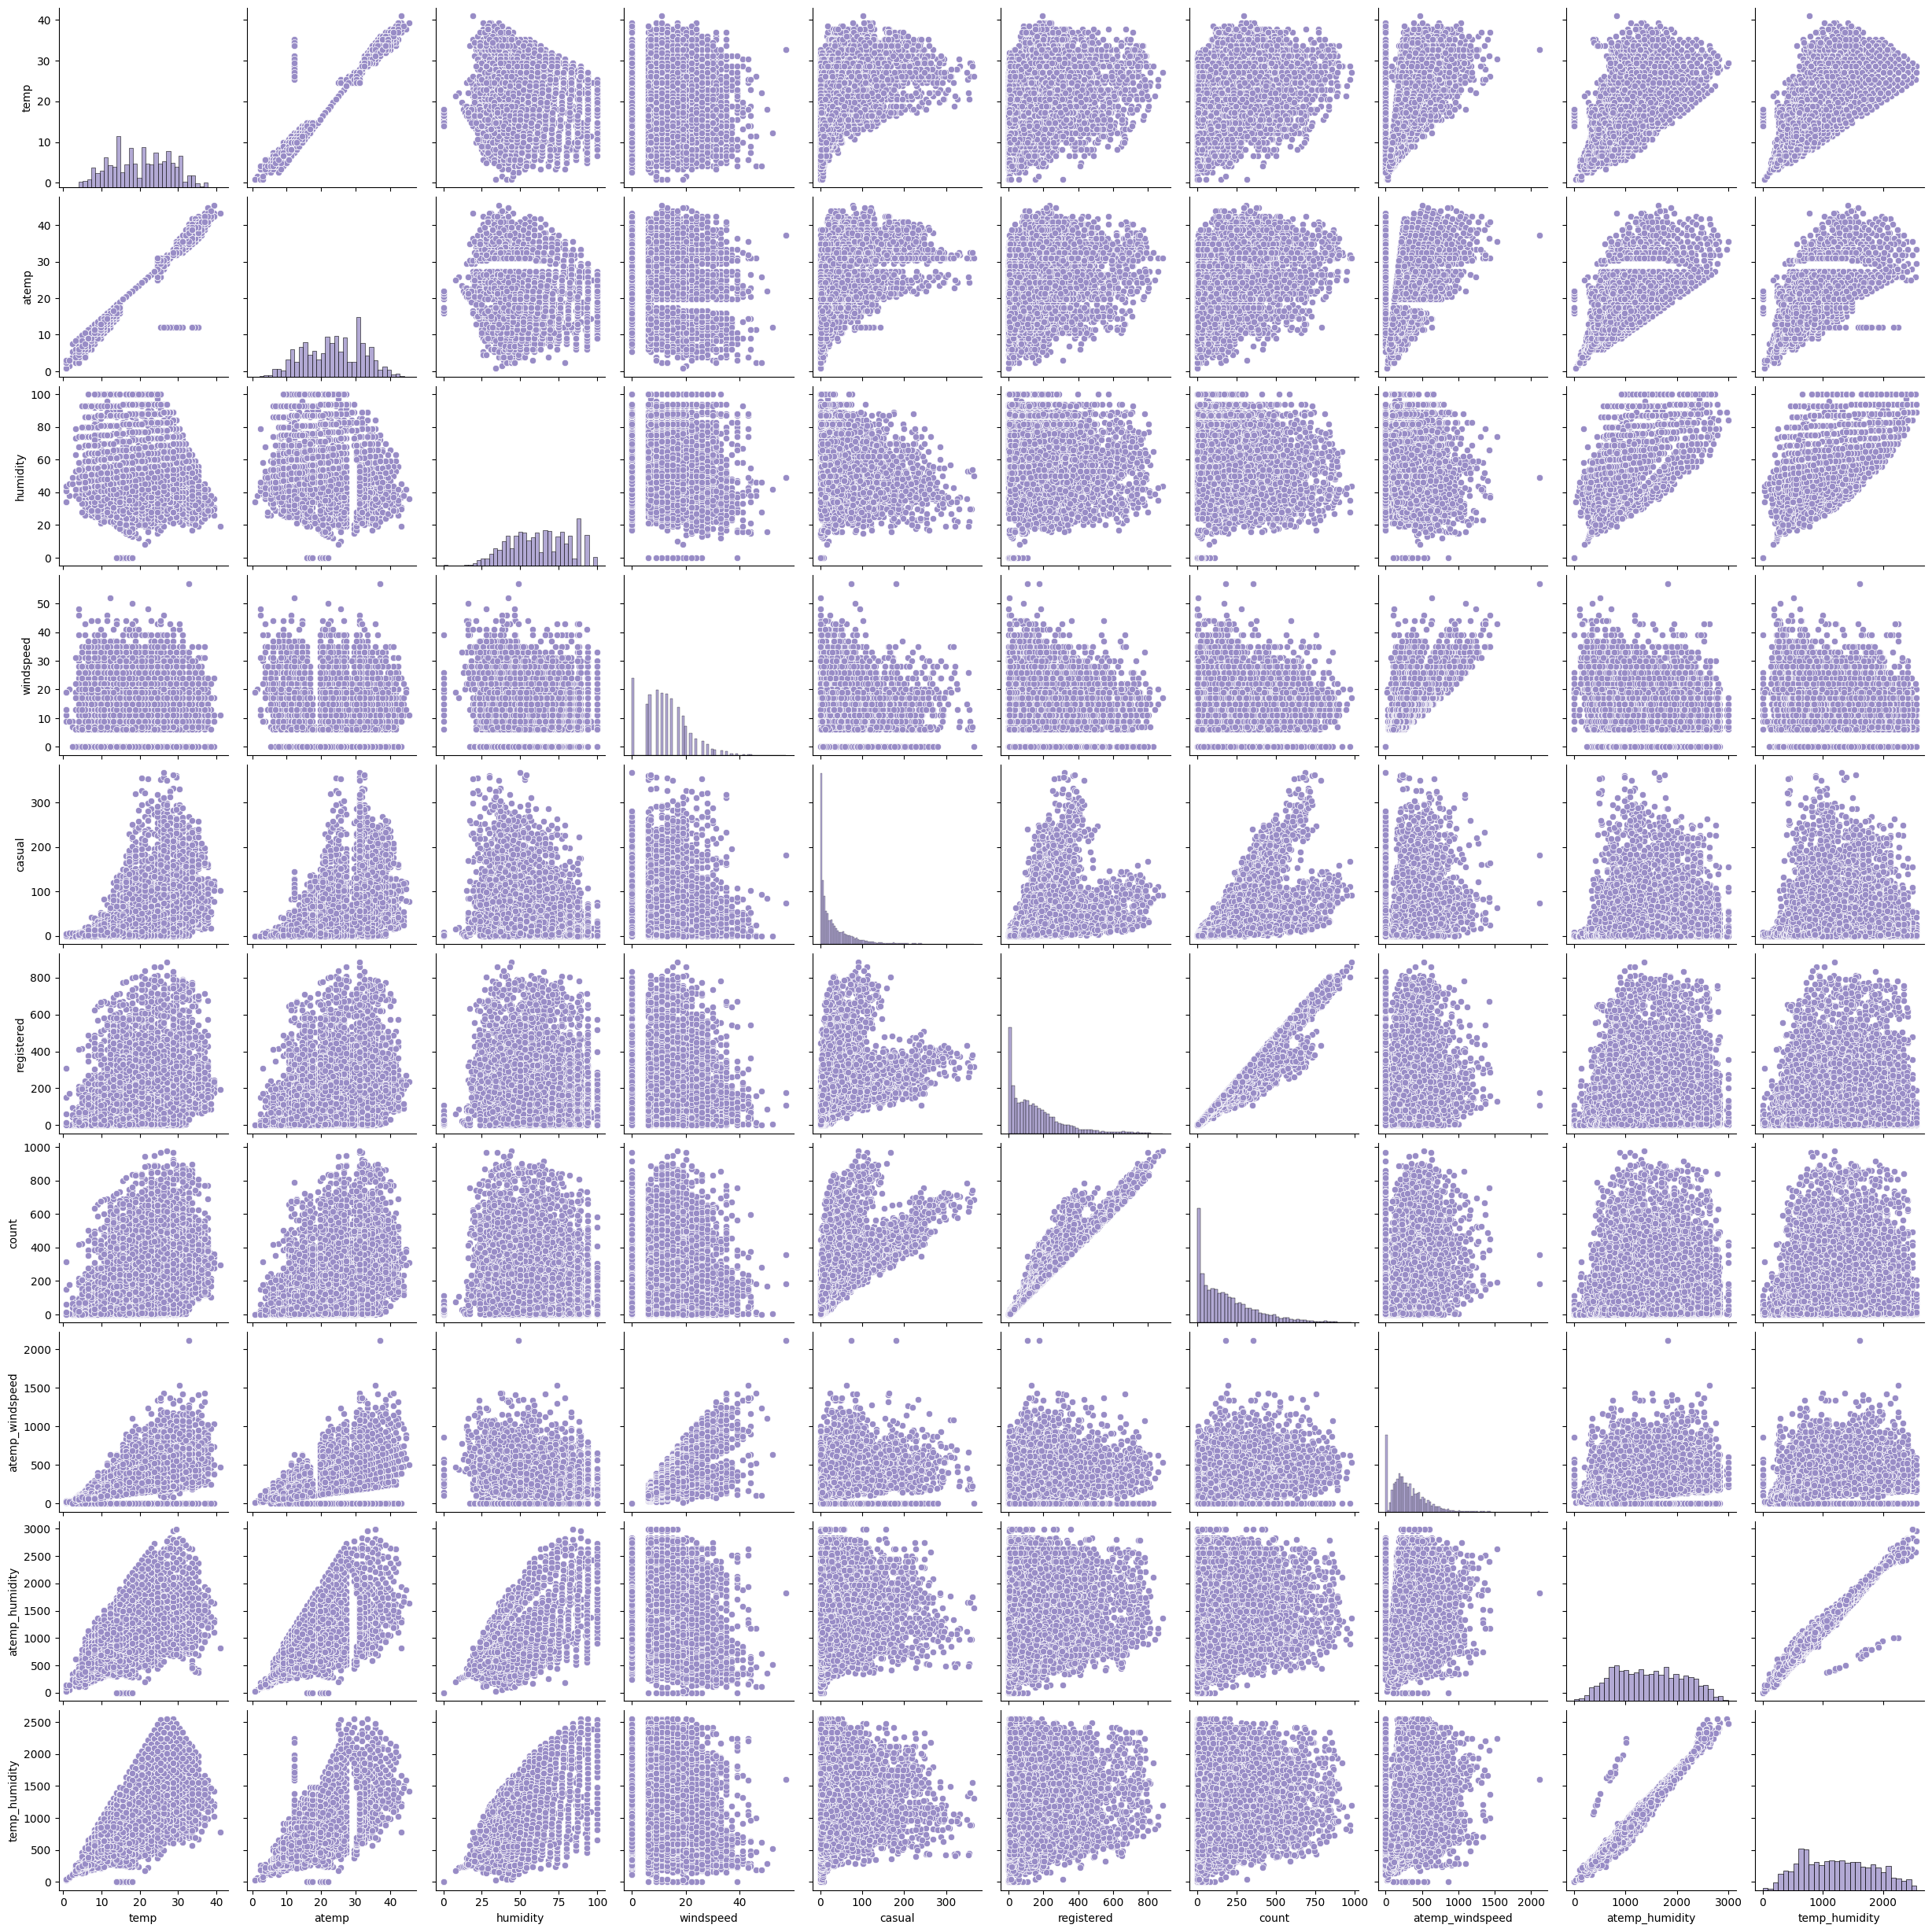

In [25]:
plt.figure(figsize=(10,10))
sns.set_palette(colors[3:6])
sns.pairplot(data=df)
plt.show()

Both the description of Numerical Columns and pairplots depict that
Temp, Atemp, Windspeed, Casual, Registered and Count all of these columns are likely to have outliers

In [11]:
df_copy=df.copy()

In [12]:
df_copy.head(2)

datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring      No         No       1  9.84  14.395   
1 2011-01-01 01:00:00  Spring      No         No       1  9.02  13.635   

   humidity  windspeed  casual  registered  count        date      time  \
0        81        0.0       3          13     16  2011-01-01  00:00:00   
1        80        0.0       8          32     40  2011-01-01  01:00:00   

  day_type  atemp_windspeed  
0  weekend              0.0  
1  weekend              0.0

In [13]:
df_copy['date']=pd.to_datetime(df_copy['date'])
df_copy['YYYY-MM']=df_copy['date'].dt.strftime('%Y-%m')
month_year_df=df_copy.groupby('YYYY-MM')['count'].sum().reset_index()
month_year_df.head()

YYYY-MM  count
0  2011-01  23552
1  2011-02  32844
2  2011-03  38735
3  2011-04  50517
4  2011-05  79713

In [14]:
time_df=pd.DataFrame(df.groupby('time')['count'].sum())
time_df.reset_index(inplace=True)
time_df.head(2)

time  count
0  00:00:00  25088
1  01:00:00  15372

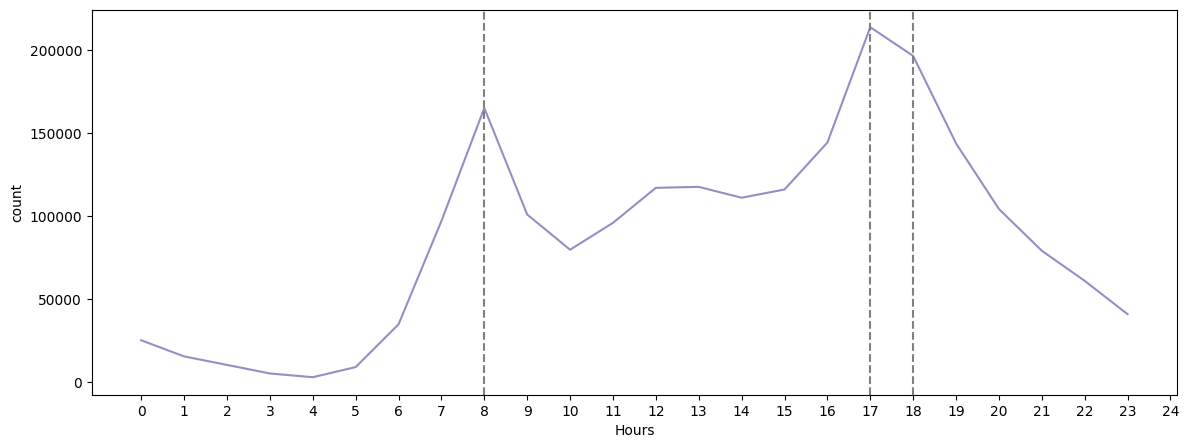

In [ ]:
mode_hours=time_df['count'].nlargest(3).index
plt.figure(figsize=(14,5))
sns.set_palette(colors[3:6])
sns.lineplot(x=time_df.index,y=time_df['count'])
plt.xlabel('Hours')
plt.xticks(np.arange(0,25,1))
for mode_hour in mode_hours:
  plt.axvline(x=mode_hour, color='gray', linestyle='--')
plt.show()

**Rental activity peaks at 8 am and 5 and 6 pm**

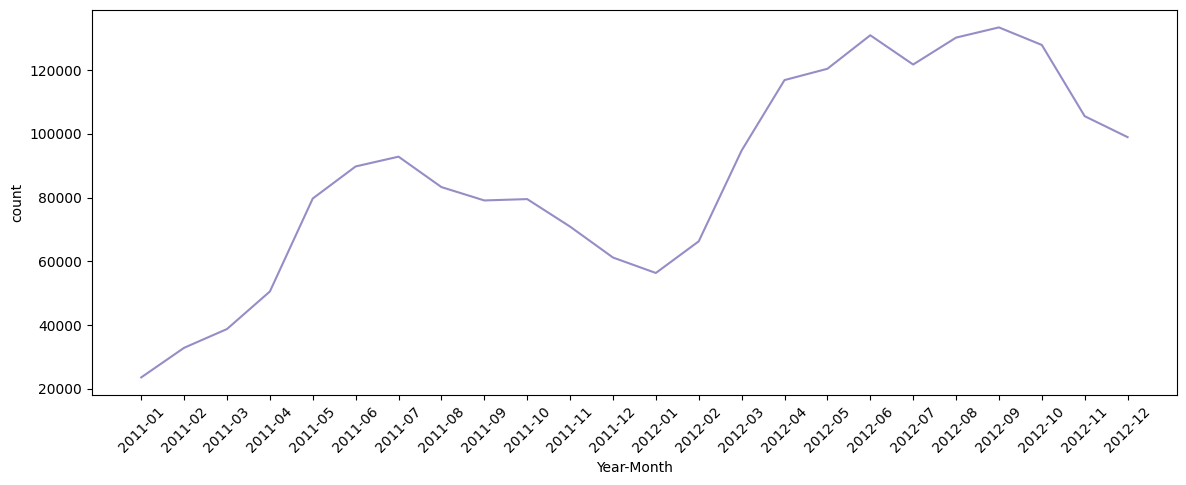

In [ ]:
plt.figure(figsize=(14,5))
sns.set_palette(colors[3:6])
sns.lineplot(data=month_year_df,x='YYYY-MM',y='count')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

**The graph illustrates a seasonal trend in rental counts, which declines each January and peaks in during middle of the year. The dip in January 2011 is more severe than the dip in January 2012, while the peak in June 2011 is lower than the peak in June 2012. This indicates a worsening trend at the start of 2011, followed by a recovery in rental activity by mid-2012.**


In [15]:
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['month'] = df_copy['date'].dt.month
df_copy['year'] = df_copy['date'].dt.year
df_copy['day'] = df_copy['date'].dt.day
df_copy.drop(['date','YYYY-MM'],axis=1,inplace=True)
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_copy['day']=pd.Categorical(df_copy['day'])
df_copy['year']=pd.Categorical(df_copy['year'])
df_copy['month']=df_copy['month'].map(month_map)
df_copy.head()

datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring      No         No       1  9.84  14.395   
1 2011-01-01 01:00:00  Spring      No         No       1  9.02  13.635   
2 2011-01-01 02:00:00  Spring      No         No       1  9.02  13.635   
3 2011-01-01 03:00:00  Spring      No         No       1  9.84  14.395   
4 2011-01-01 04:00:00  Spring      No         No       1  9.84  14.395   

   humidity  windspeed  casual  registered  count      time day_type  \
0        81        0.0       3          13     16  00:00:00  weekend   
1        80        0.0       8          32     40  01:00:00  weekend   
2        80        0.0       5          27     32  02:00:00  weekend   
3        75        0.0       3          10     13  03:00:00  weekend   
4        75        0.0       0           1      1  04:00:00  weekend   

   atemp_windspeed month  year day  
0              0.0   Jan  2011   1  
1              0.0   Jan  2011   1  
2              0.0   Jan  2011   1  
3              0.0   Jan  2011   1  
4              0.0   Jan  2011   1

In [ ]:
df_copy.groupby('year')['casual'].sum()

year
2011    155817
2012    236318
Name: casual, dtype: int64

In [ ]:
df_copy.groupby('year')['registered'].sum()

year
2011     626162
2012    1067179
Name: registered, dtype: int64

**From 2011 to 2012, the overall number of bike rentals has increased as well as number of Registered Customers increased.**

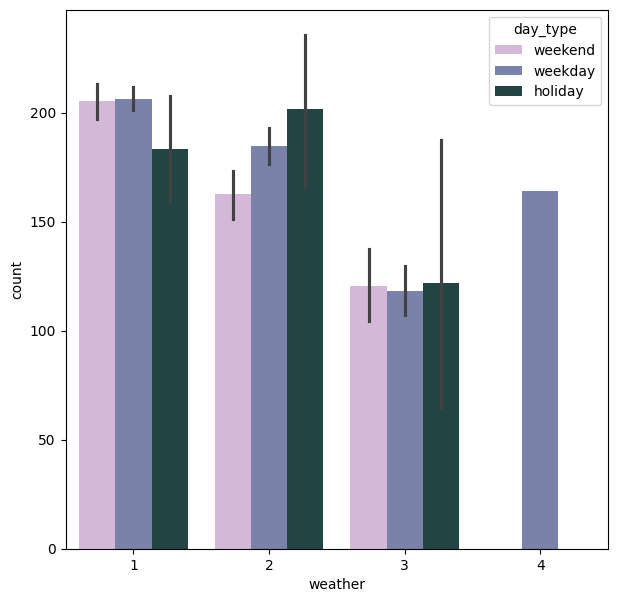

In [ ]:
plt.figure(figsize=(7,7))
sns.set_palette(colors[1:8:3])
sns.barplot(x=df['weather'],y=df['count'],hue=df['day_type'])
plt.show()

1:Clear, Few clouds, partly cloudy, partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [ ]:
df_4=df[df['weather']==4]
df_4

season weather  temp   atemp  humidity  windspeed  casual  registered  \
5631  Spring       4   8.2  11.365        86     6.0032       6         158   

      count        date      time day_type  atemp_windspeed  atemp_humidity  
5631    164  2012-01-09  18:00:00  weekday        68.226368          977.39

**158 Registered and 6 Non-registered users have rented bikes even in heavy rain, ice-pallets, thunderstorm and mist only on a weekday supposedly for office purpose.**

<Figure size 700x700 with 0 Axes>

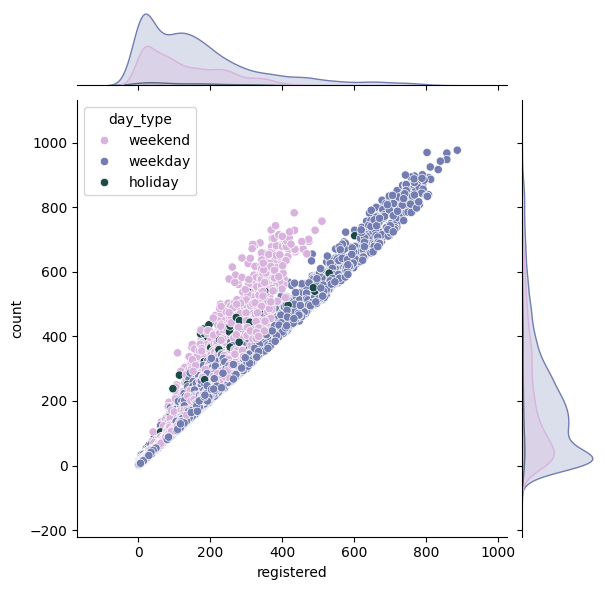

In [ ]:
plt.figure(figsize=(7,7))
sns.set_palette(colors[1:8:3])
sns.jointplot(x=df['registered'],y=df['count'],hue=df['day_type'])
plt.show()

*There's a linear correlation between Registered users and Count for weekdays.*

**Outlier Detection with BoxPlot**

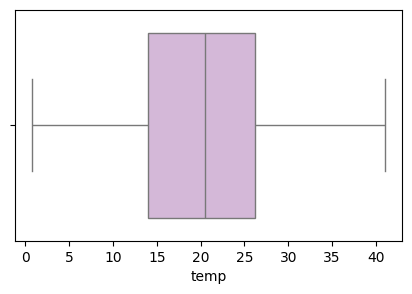

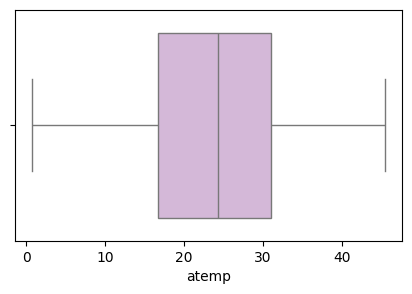

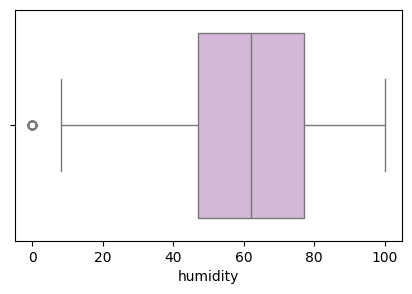

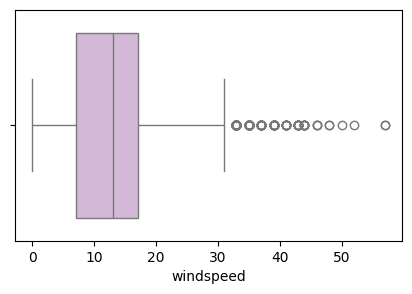

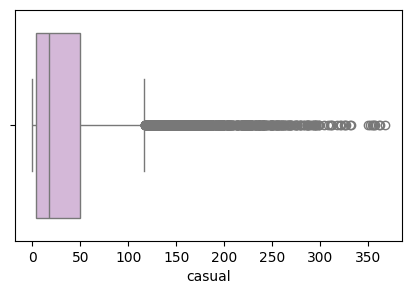

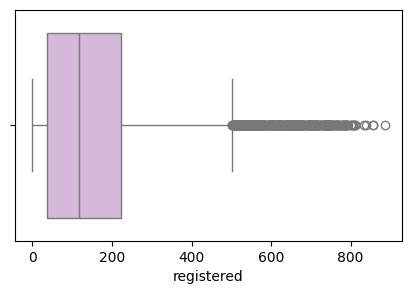

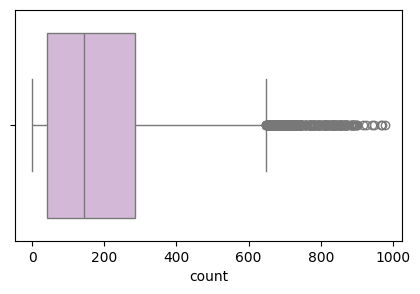

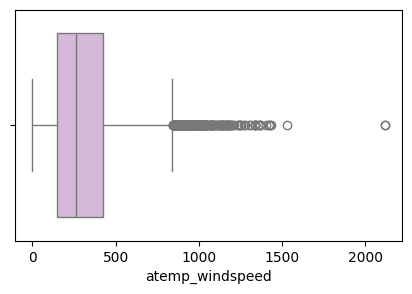

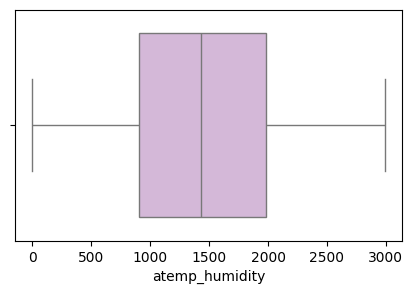

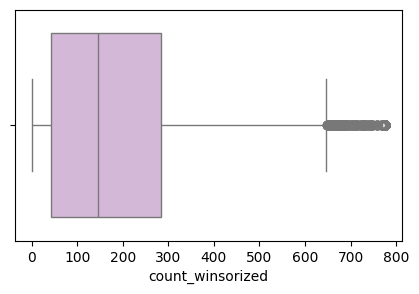

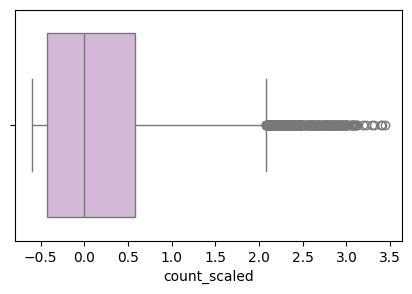

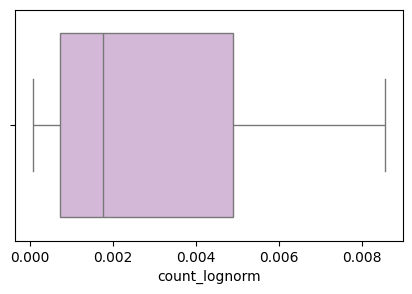

In [ ]:
df_num=df.select_dtypes(include=np.number)
sns.set_palette(colors[1:8:3])
for col in enumerate(df_num):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=col[1], data=df_num)
  plt.show()

From the above plots we can confirm that Windspeed, Casual, Registered, Count all these columns have outliers.

In [ ]:
def z_outlier(column):
  z_score=scipy.stats.zscore(df[column])
  n=df.index[np.abs(z_score)>3]
  outliers=pd.Series(n).count()
  percentage= outliers*100/df.shape[0]
  print(f"The number of outliers present in column '{column}' is {outliers} which is {round(percentage,2)} % of the total data")
  return

In [ ]:
wind_olr=z_outlier('windspeed')

The number of outliers present in column 'windspeed' is 67 which is 0.62 % of the total data


In [ ]:
z_outlier('count')

The number of outliers present in column 'count' is 147 which is 1.35 % of the total data


In [ ]:
z_score_threshold=3
z_score=np.abs(scipy.stats.zscore(df['count']))
iqr=df[z_score<z_score_threshold]

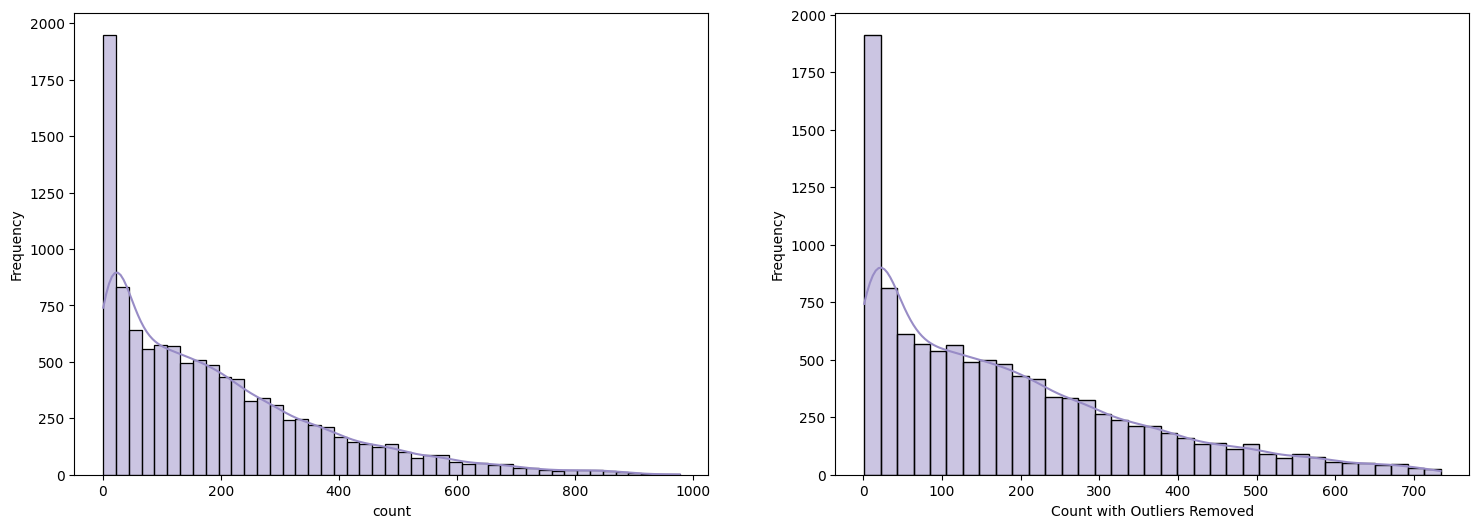

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
sns.set_palette(colors[3:8:3])
plt.subplot(1,2,1)
sns.histplot(df['count'],kde=True)
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.histplot(iqr['count'],kde=True)
plt.xlabel("Count with Outliers Removed")
plt.ylabel("Frequency")
plt.show()

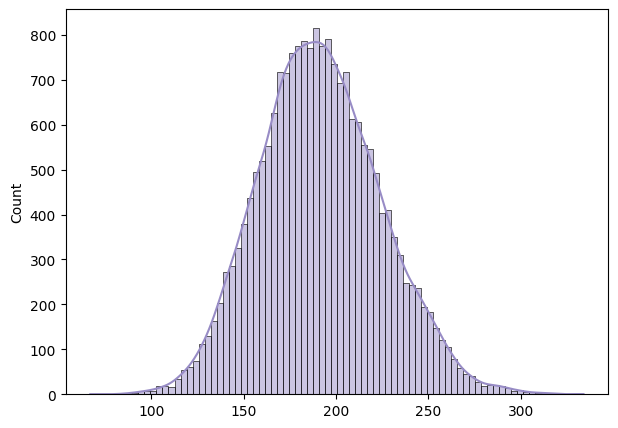

In [ ]:
n=20000
Count_CLT=[np.mean(df['count'].sample(30)) for i in range(n)]
plt.figure(figsize=(7,5))
sns.set_palette(colors[3:8:3])
sns.histplot(Count_CLT, kde=True)
plt.show()

Even though the original distribution of Count doesn't follow Gaussian distribution but it follows CLT, so we can apply parametric tests on it.

In [ ]:
df.groupby('season')['count'].sum()

season
Fall      640662
Spring    312498
Summer    588282
Winter    544034
Name: count, dtype: int64

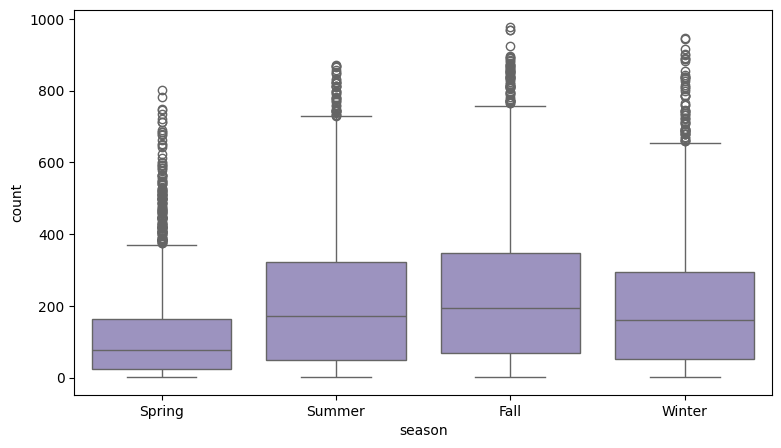

In [ ]:
plt.figure(figsize=(9,5))
sns.set_palette(colors[3:8:3])
sns.boxplot(x='season',y='count',data=df)
plt.show()

*In the above boxplot, we can see that the variances for Spring and Winter differ a lot from Summer and Fall.*

In [ ]:
spring=df[df['season']=='Spring']['count']
summer=df[df['season']=='Summer']['count']
fall=df[df['season']=='Fall']['count']
winter=df[df['season']=='Winter']['count']

In [ ]:
stats, p_value=stats.kruskal(spring,summer,fall,winter)
print(f"Kruskal-Wallis Statistic: {stats}")
print(f"P-value: {p_value}")

Kruskal-Wallis Statistic: 699.6668548181988
P-value: 2.479008372608633e-151


**The P-value for Kruskal Wallis Test came out to be pretty low, which means it the count depends on season.**

In [ ]:
stat,p_value=stats.levene(summer,fall)
print(f"Levene's Statistic: {stat}")
print(f"P-value: {p_value}")

Levene's Statistic: 1.320649330444808
P-value: 0.2505258503598953


*As the P-value for Levene's test is quite high, we can conclude variance of Summer and Fall is not significantly different, so we will check whether the mean count for summer and fall is significantly different or not.*

In [ ]:
t_stat,p_val=stats.ttest_ind(summer,fall)
print(f"F-statistic: {t_stat}")
print(f"P-value: {p_val}")

F-statistic: -3.6407918229052068
P-value: 0.00027431561172498644


**The P-value for T test came out to be quite low, which means the mean of Count is quite different for Summer or Fall as well.**

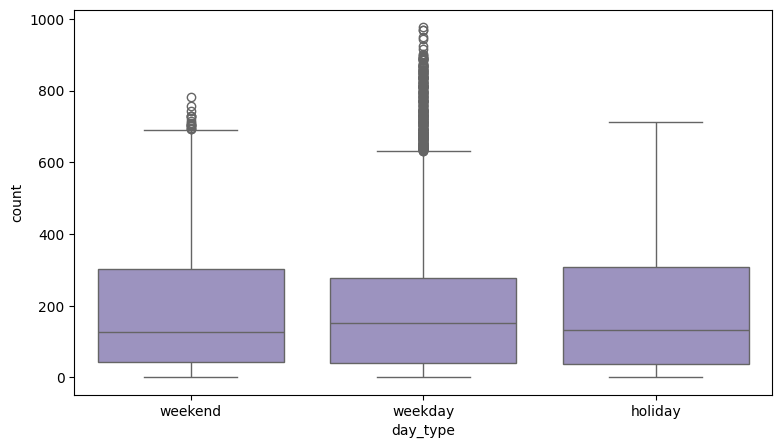

In [ ]:
plt.figure(figsize=(9,5))
sns.set_palette(colors[3:8:3])
sns.boxplot(x='day_type',y='count',data=df)
plt.show()

In [ ]:
weekday=df[df['day_type']=='weekday']['count']
weekend=df[df['day_type']=='weekend']['count']
holiday=df[df['day_type']=='holiday']['count']

In [ ]:
stat,p_value=stats.levene(weekday,weekend,holiday)
print(f"Levene's Statistic: {stat}")
print(f"P-value: {p_value}")

Levene's Statistic: 0.0025091524077971317
P-value: 0.9974939934613841


*The P-Value for Levene's test turned out to be very high, which means that all the three groups has almost equal variances. We can go for Anova Test to test whether the mean of those groups significantly differ or not.*

In [ ]:
stat,p_value=stats.f_oneway(weekday,weekend,holiday)
print(f"F-statistic: {stat}")
print(f"P-value: {p_value}")

F-statistic: 0.7675047133564139
P-value: 0.4641949837127587


The P-Value for Anova Test is high, so we cannot reject Null Hypothesis.<br> **There is no significant difference between in bike demand across weekdays, weekends and holidays.**

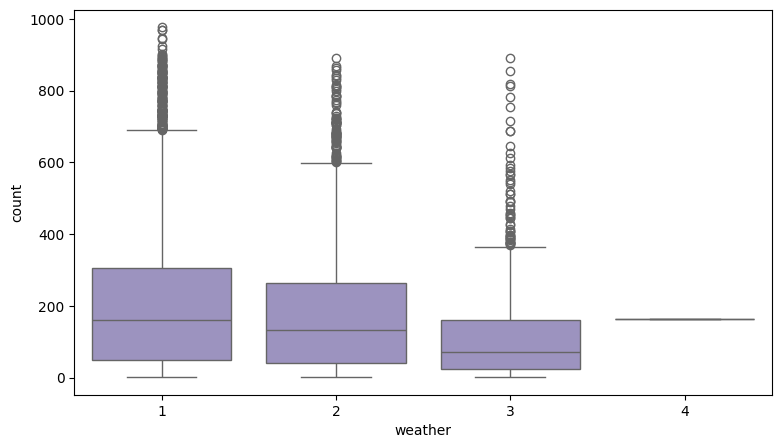

In [ ]:
plt.figure(figsize=(9,5))
sns.set_palette(colors[3:8:3])
sns.boxplot(x='weather',y='count',data=df)
plt.show()

*The distribution of Count for the fourth type of weather is very concentrated. Although the variances of all the groups seem to differ from the box plot, but still we will go for a statistical test for first and second type of weather.*

In [ ]:
stats, p_value=stats.levene(df[df['weather']=='1']['count'],df[df['weather']=='2']['count'])
print(f"Levene's Statistic: {stats}")
print(f"P-value: {p_value}")

Levene's Statistic: 39.45555202285377
P-value: 3.49541909725777e-10


*The P value for the Levene's test turned out to be very low, which means there's no homogenity of variance across the first and second group of weather.*

In [ ]:
stats, p_value=stats.kruskal(df[df['weather']=='1']['count'],df[df['weather']=='2']['count'],df[df['weather']=='3']['count'],df[df['weather']=='4']['count'])
print(f"Kruskal-Wallis Statistic: {stats}")
print(f"P-value: {p_value}")

Kruskal-Wallis Statistic: 205.00216514479087
P-value: 3.501611300708679e-44


**The P Value of Kruskal Wallis Test is too low, which means the mean Count of each group of Weather varies significantly.**

In [ ]:
import scipy.stats as stats

In [ ]:
# H0: Weather and Season are not dependent.
# Ha: Weather depends on Season.
chi2_stat, p_value, dof, expected=stats.chi2_contingency(pd.crosstab(df['weather'],df['season']))
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Degrees of Freedom: 9


**P value is much less, which means Weather is dependent on the Season.**

In [ ]:
data=df.groupby(['weather','season'])['count'].mean().reset_index()

In [ ]:
data['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
data['season'].unique()

array(['Fall', 'Spring', 'Summer', 'Winter'], dtype=object)

In [ ]:
data=df.groupby(['weather','season'])['count'].mean().reset_index()
data['weather_season']=data['season'].astype(str)+'_'+data['weather'].astype(str)
data.rename(columns={'count':'season_weather_score'}, inplace=True)
data.drop(['weather','season'], axis=1,inplace=True)
data.dropna(inplace=True)
data.head()

season_weather_score weather_season
0            243.583420         Fall_1
1            126.781694       Spring_1
2            236.729595       Summer_1
3            209.511163       Winter_1
4            230.771523         Fall_2

In [ ]:
from scipy.stats import kruskal
st, p_value=kruskal(*[data[data['weather_season'] == cat]['season_weather_score'] for cat in data['weather_season'].unique()])
p_value

0.44567964136461097

**The P value of Kruskal Wallis test is pretty high, indicating that there's no enough proof to believe that our new feature weather_season is a good predictor for count of rents.**

In [ ]:
numerical_columns=df.select_dtypes(include=np.number)
numerical_columns.head(2)

temp   atemp  humidity  windspeed  casual  registered  count  \
0  9.84  14.395        81        0.0       3          13     16   
1  9.02  13.635        80        0.0       8          32     40   

   atemp_windspeed  atemp_humidity  
0              0.0        1165.995  
1              0.0        1090.800

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

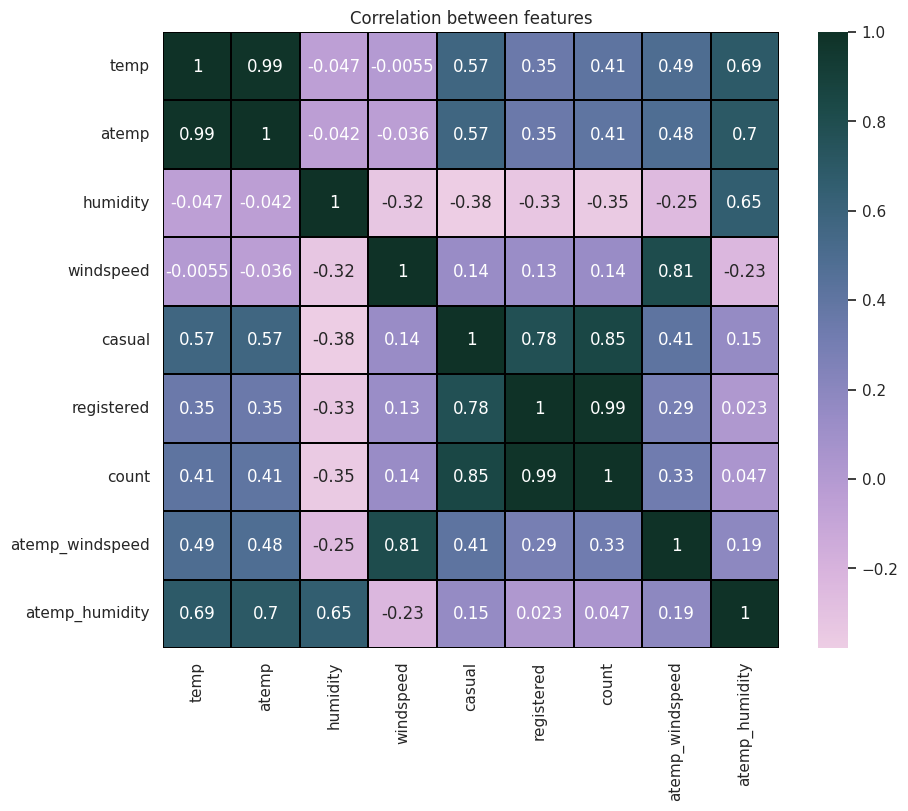

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))
correlation_values = numerical_columns.corr(method = 'spearman')
sns.heatmap(correlation_values, linewidths=0.01, square=True, annot=True, cmap=custom_cmap, linecolor="black")
plt.title('Correlation between features')
plt.show()

*No factor seems to directly correlate with Count. Temperature seems to moderately affect the number of bike rents by casual users.If Temperature increases casual users are more likely to rent bikes but there are other factors too which affect this. So further investigation is needed.*

In [ ]:
sizes=[df['registered'].sum(),df['casual'].sum()]
sizes

[1693341, 392135]

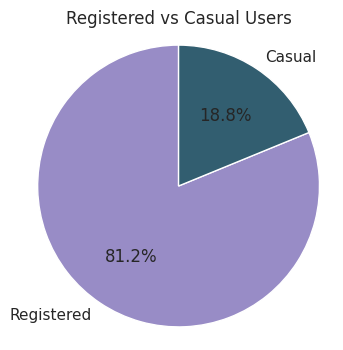

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=['Registered','Casual'], autopct='%1.1f%%',startangle=90,colors=colors[3:8:3])
plt.title('Registered vs Casual Users')
plt.axis('equal')
plt.show()

In [ ]:
_reg_olr=z_outlier('registered')

The number of outliers present in column 'registered' is 235 which is 2.16 % of the total data


In [ ]:
cas_olr=z_outlier('casual')

The number of outliers present in column 'casual' is 292 which is 2.68 % of the total data


In [ ]:
import scipy.stats as stats
for i in ['registered', 'casual']:
  iqr=df[~np.abs(stats.zscore(df[i])<3)]
iqr.head(2)

season weather   temp   atemp  humidity  windspeed  casual  registered  \
1384  Summer       1  18.04  21.970        33    19.9995     219         148   
1385  Summer       1  18.86  22.725        31     8.9981     240         109   

      count        date      time day_type  atemp_windspeed  atemp_humidity  
1384    367  2011-04-03  13:00:00  weekend       439.389015         725.010  
1385    349  2011-04-03  14:00:00  weekend       204.481823         704.475

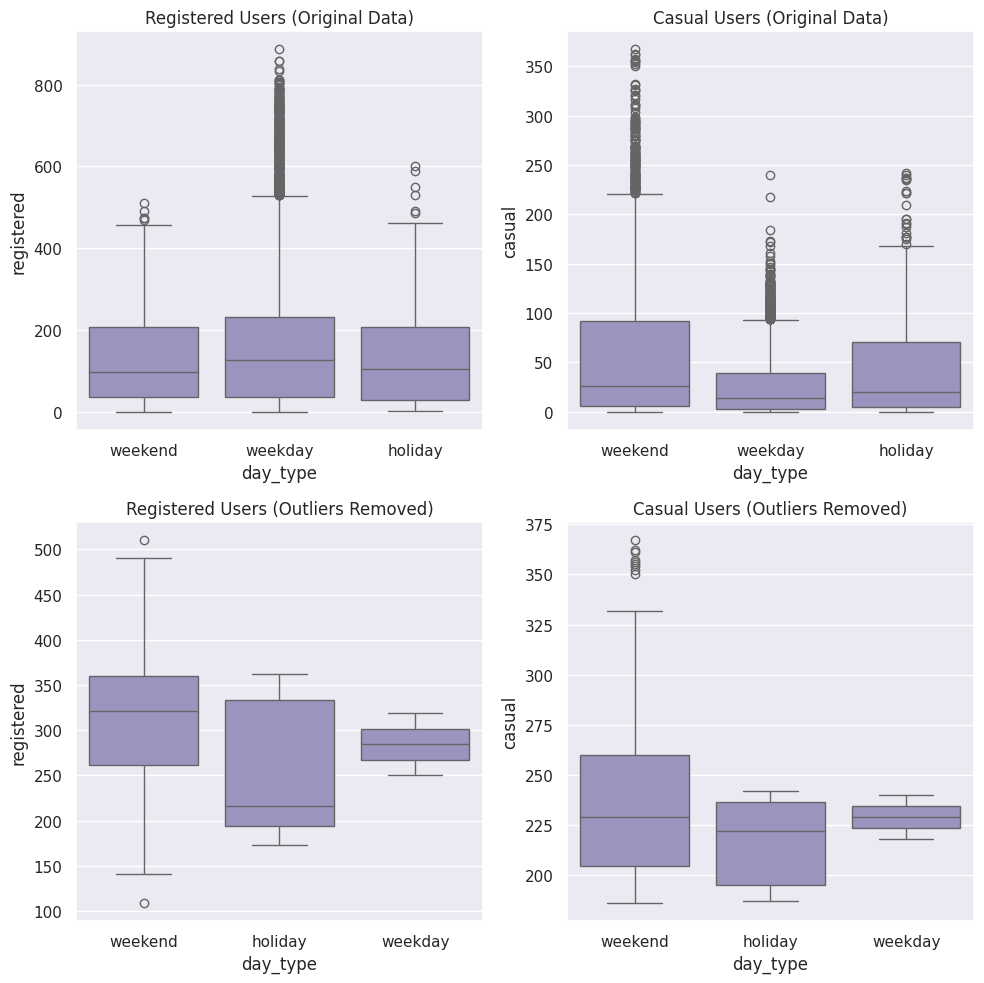

In [ ]:
plt.rcParams["figure.figsize"] = [18,18]
sns.set_palette(colors[3:8:3])
fig, axs = plt.subplots(2, 2,figsize=(10,10))
sns.boxplot(x='day_type', y='registered', data=df, ax=axs[0, 0])
sns.boxplot(x='day_type', y='casual', data=df, ax=axs[0, 1])
sns.boxplot(x='day_type', y='registered', data=iqr, ax=axs[1, 0])
sns.boxplot(x='day_type', y='casual', data=iqr, ax=axs[1, 1])

axs[0, 0].set_title("Registered Users (Original Data)")
axs[0, 1].set_title("Casual Users (Original Data)")
axs[1, 0].set_title("Registered Users (Outliers Removed)")
axs[1, 1].set_title("Casual Users (Outliers Removed)")

plt.tight_layout()

plt.show()

*As we can see the variance looks significantly different for each type of day. So we'll go for Levene's test first.*

In [ ]:
weekend_reg=df[df['day_type']=='weekend']['registered']
weekend_cas=df[df['day_type']=='weekend']['casual']
weekday_reg=df[df['day_type']=='weekday']['registered']
weekday_cas=df[df['day_type']=='weekday']['casual']
holiday_reg=df[df['day_type']=='holiday']['registered']
holiday_cas=df[df['day_type']=='holiday']['casual']

In [ ]:
# H0: Both the group has similar variance
# Ha: The variance significantly differ among the groups
# Significance Level: alpha= 0.05

import scipy.stats as stats
stats,p_Value=stats.levene(weekend_reg,weekday_reg,holiday_reg)
print(f"Levene's Statistic: {stats}")
print(f"P-value: {p_Value}")

Levene's Statistic: 103.8859102510748
P-value: 2.0332585524529083e-45


In [ ]:
from scipy.stats import levene, kruskal, ttest_ind
stats,p_Value=levene(weekend_cas,weekday_cas,holiday_cas)
print(f"Levene's Statistic: {stats}")
print(f"P-value: {p_Value}")

Levene's Statistic: 701.8248023473451
P-value: 2.0673875367086256e-287


*In both the cases, we reject null hypothesis.*

In [ ]:
# H0: Both the group has similar mean
# Ha: The mean significantly differ among the groups
# Significance Level: alpha= 0.05

stats,p_Value=ttest_ind(weekend_reg,holiday_reg)
print(f"t Statistic: {stats}")
print(f"P-value: {p_Value}")

t Statistic: -1.3435727663006887
P-value: 0.17917438206737857


In [ ]:
stats,p_Value=ttest_ind(weekday_reg,weekend_reg)
print(f"t Statistic: {stats}")
print(f"P-value: {p_Value}")

t Statistic: 12.336694925413084
P-value: 9.956628799915324e-35


*The P_value for t test between weekend_reg and holiday_reg came out pretty high,whereas between weekday_reg and weekend_reg it came out too low.In first case, we can't reject null hypothesis which means count of bike rents is similar in two groups, whereas in second case we reject null hypothesis. That signifies count of bike rents in weekdays is quite different.*  

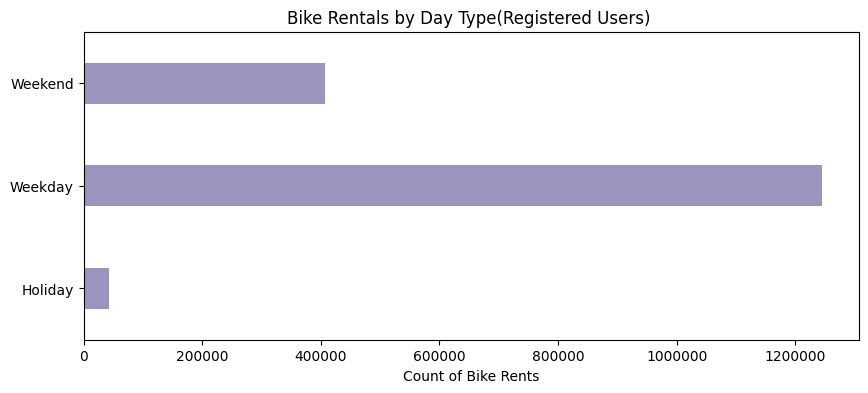

In [ ]:
categories = ['Weekend', 'Weekday', 'Holiday']
values = [weekend_reg.sum(), weekday_reg.sum(), holiday_reg.sum()]

plt.figure(figsize=(10,4))
sns.set_palette(colors[3:8:3])
sns.barplot(y=categories,x=values,width=0.4)
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel("Count of Bike Rents")
plt.title("Bike Rentals by Day Type(Registered Users) ")
plt.show()

**Weekday rentals are dominant among registered bike users.**

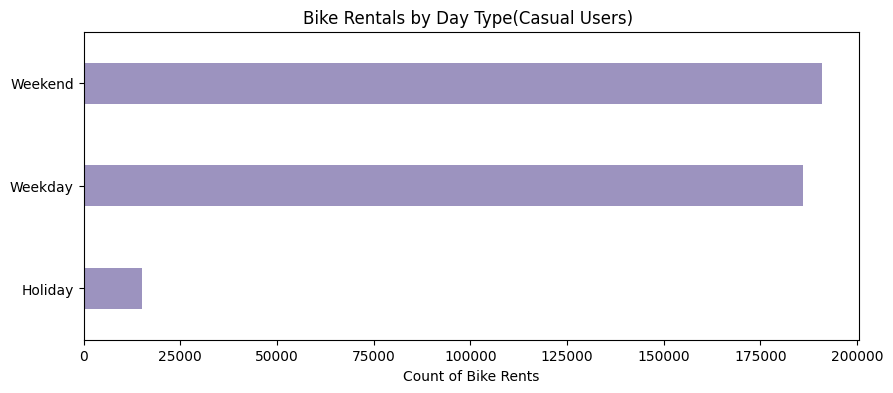

In [ ]:
categories = ['Weekend', 'Weekday', 'Holiday']
values = [weekend_cas.sum(), weekday_cas.sum(), holiday_cas.sum()]

plt.figure(figsize=(10,4))
sns.set_palette(colors[3:8:3])
sns.barplot(y=categories,x=values,width=0.4)
plt.xlabel("Count of Bike Rents")
plt.title("Bike Rentals by Day Type(Casual Users) ")
plt.show()

In [ ]:
# significance level: alpha= 0.05
stats,p_Value=ttest_ind(weekend_cas,holiday_cas)
print(f"t Statistic: {stats}")
print(f"P-value: {p_Value}")

t Statistic: 2.6796871306720997
P-value: 0.007403882100359601


In [ ]:
stats,p_Value=ttest_ind(weekday_cas,holiday_cas)
print(f"t Statistic: {stats}")
print(f"P-value: {p_Value}")

t Statistic: -13.361685689618607
P-value: 2.829809559153562e-40


In [ ]:
stats,p_Value=ttest_ind(weekend_cas,weekday_cas)
print(f"t Statistic: {stats}")
print(f"P-value: {p_Value}")

t Statistic: 35.42239814375073
P-value: 8.020270493944697e-260


*We reject null hypothesis in all the cases, which mean of bike rentals are different in all the day type among casual users.*

# **Recommendation:**

*   Since the majority of users are registered, Yulu should prioritize catering to them. Most registered users rent bikes on weekdays, likely for commuting to work. Rental demand peaks at 8 AM and again between 5 and 6 PM, aligning with typical office hours. To enhance user experience, Yulu can ensure faster bike availability during these peak weekday hours and should introduce discounted bulk rentals for regular users.
*   Users are also likely to rent bikes on weekends as well, so special pricing on weekends.

*   January has the lowest rental activity. Yulu can introduce seasonal discount campaigns or referral bonuses to drive demand during this period





